# Setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/train.csv')
#df_test = pd.read_csv('datasets/test.csv')

# Overview

## Shape, head, info, Null, Duplicated values

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('The rate of NaN values by columns')
100 * df.isnull().sum()/df.shape[0]

The rate of NaN values by columns


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
df["PassengerId"].duplicated().sum()

0

## Describe

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ling, Mr. Lee",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
new_df = pd.concat([df.Pclass.astype("category"), 
           df.SibSp.astype("category"), df.Parch.astype("category")], axis = 1)
new_df.describe()

,Pclass,SibSp,Parch
count,891,891,891
unique,3,7,7
top,3,0,0
freq,491,608,678


# EDA (I): Each column

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Delete some columns

In [12]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Survived (Label column)

In [15]:
df['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## Age, Fare (Numerical columns)

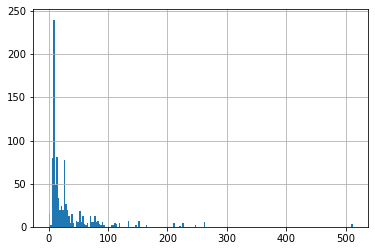

In [16]:
df['Fare'].hist(bins=200);

In [17]:
# df['Fare'].plot.hist(bins=200);
# sns.displot(df_train, x="Fare");

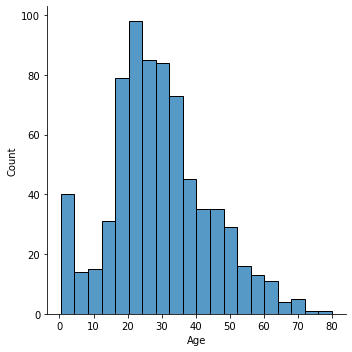

In [18]:
sns.displot(data = df, x = 'Age')

## Embarked (category type)

In [19]:
df[['Embarked']].describe()

,Embarked
count,889
unique,3
top,S
freq,644


In [20]:
df[['Embarked']].isnull().sum()

Embarked    2
dtype: int64

In [21]:
df['Embarked'].value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

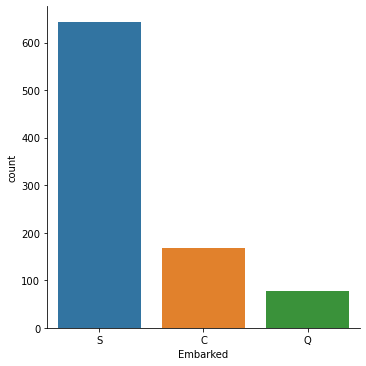

In [22]:
sns.catplot(x = 'Embarked', data = df, kind='count')
#df['Embarked'].value_counts().plot.bar()

## Pclass, Sex, (Interger type)

### Pclass

In [23]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

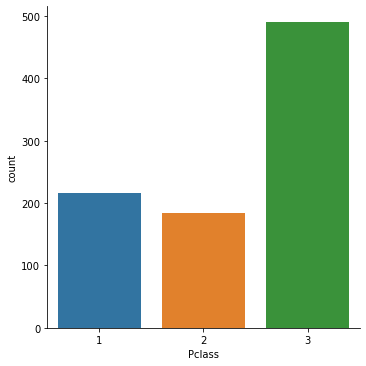

In [24]:
sns.catplot(x = 'Pclass', data = df, kind='count');

### Sex

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

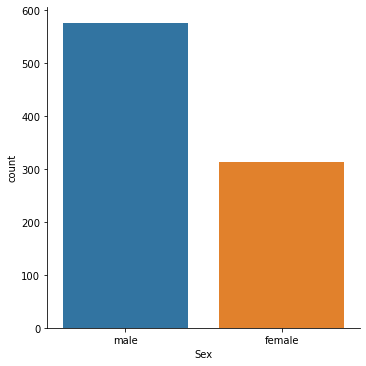

In [26]:
sns.catplot(x = 'Sex', data = df, kind='count');

### Parch

In [27]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

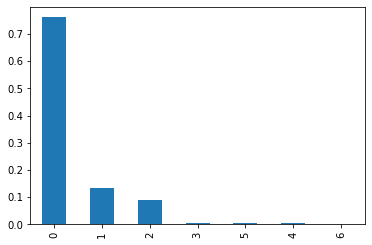

In [28]:
df['Parch'].value_counts(normalize = True).plot.bar()

# EDA (II.a): Column vs Columns

##  Pclass vs Survives  [Category vs Boolean]

In [29]:
df.groupby('Pclass', as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Ratio of survived people by Classs**

### More infos

In [30]:
# df.groupby('Pclass', as_index = False)['Survived'].count()
# df.groupby('Pclass', as_index = False)['Survived'].sum()

In [31]:
pd.crosstab(df.Pclass, df.Survived, margins=True, margins_name="Total") 

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
Total,549,342,891


In [32]:
#pd.crosstab(df_train.Pclass, df_train.Survived)
#pd.crosstab(df_train.Pclass, df_train.Survived, margins=True, margins_name="Total") 
#pd.crosstab(df_train.Pclass, df_train.Survived, normalize=True, margins=True, margins_name="Total") 
#normalize='columns'
pd.crosstab(df.Pclass, df.Survived, normalize='index') 

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [33]:
# df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)

### Visualisation

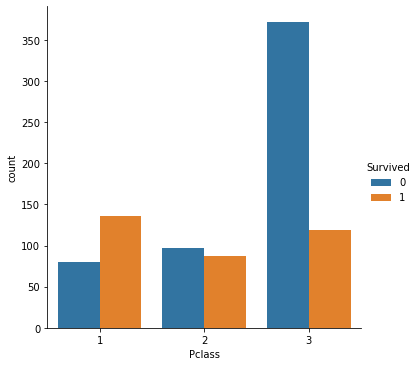

In [34]:
sns.catplot(x='Pclass', hue = 'Survived', data = df, kind ='count')
#sns.catplot(x='Pclass', data=df_train, col="Survived", kind='count'). # Tách đồ thị

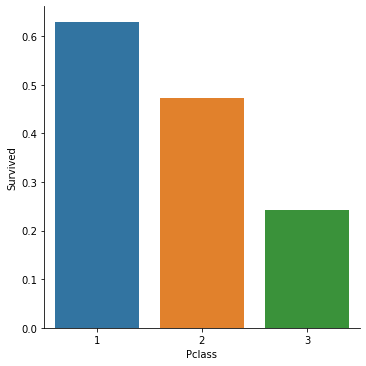

In [35]:
# Phần trăm người của các Pclass sống sót
#df.groupby('Pclass')['Survived'].mean().plot.bar();
sns.catplot(x = 'Pclass', y = 'Survived', data = df, kind = 'bar', ci=None)

## Sib vs labels  [Category vs Boolean]

In [36]:
df.groupby('SibSp')['Survived'].agg(['count', 'mean'])

,count,mean
SibSp,,
0,608,0.345395
1,209,0.535885
2,28,0.464286
3,16,0.250000
4,18,0.166667
5,5,0.000000
8,7,0.000000


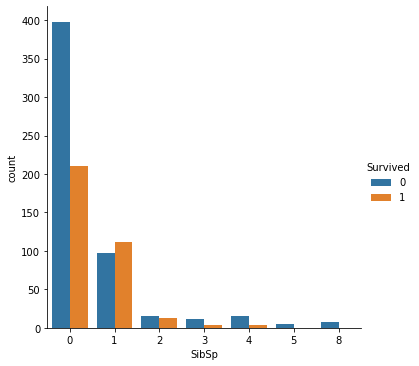

In [37]:
sns.catplot(x='SibSp', hue = 'Survived', data = df, kind ='count');

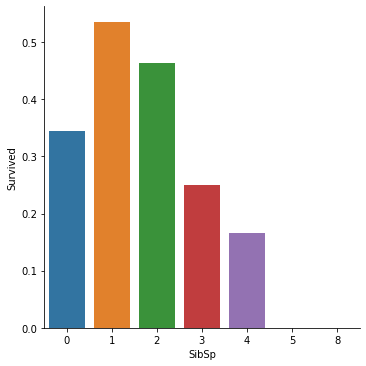

In [38]:
## Tỷ lệ phần trăm sống sót bởi group
#df_train.groupby('SibSp')['Survived'].mean().plot.bar();
sns.catplot(x = 'SibSp', y = 'Survived', data = df, kind = 'bar', ci = None)

## Parch vs labels

In [39]:
df.groupby('Parch')['Survived'].agg(['count', 'mean'])

,count,mean
Parch,,
0,678,0.343658
1,118,0.550847
2,80,0.500000
3,5,0.600000
4,4,0.000000
5,5,0.200000
6,1,0.000000


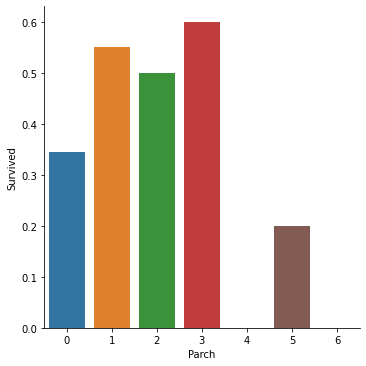

In [40]:
sns.catplot( x = 'Parch', y = 'Survived', data= df, kind = 'bar', ci = None);

## Sex  vs label

In [41]:
df.groupby('Sex')['Survived'].agg(['count', 'mean'])

,count,mean
Sex,,
female,314,0.742038
male,577,0.188908


In [42]:
pd.crosstab(df.Sex, df.Survived, normalize = 0)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [43]:
pd.crosstab(df.Sex, df.Survived, margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


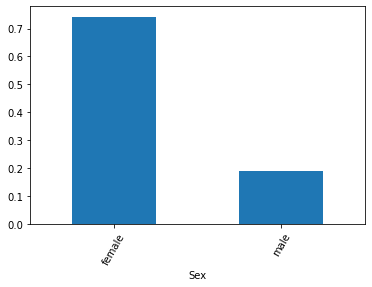

In [44]:
df.groupby('Sex')['Survived'].agg(['count', 'mean'])['mean'].plot.bar(rot=60);

## Embarque/labes

In [45]:
df.groupby('Embarked')['Survived'].agg(['count', 'mean'])

,count,mean
Embarked,,
C,168,0.553571
Q,77,0.389610
S,644,0.336957


<AxesSubplot:xlabel='Embarked'>

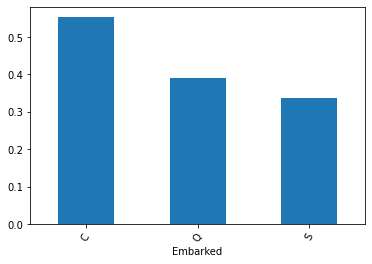

In [46]:
df.groupby('Embarked')['Survived'].mean().plot.bar(rot=60)

# EDA (II.b): Column vs Columns

## Age vs Label

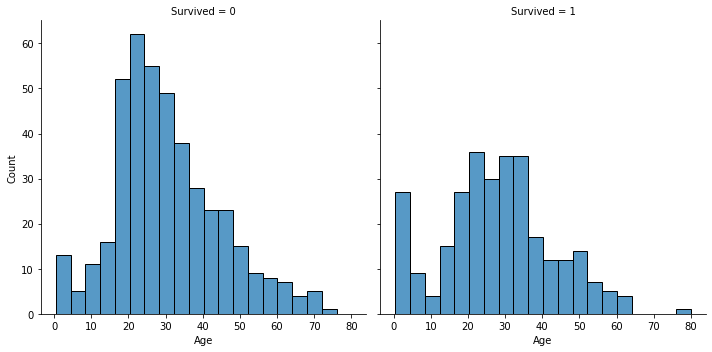

In [47]:
sns.displot(df, x="Age", col="Survived", kde=False)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

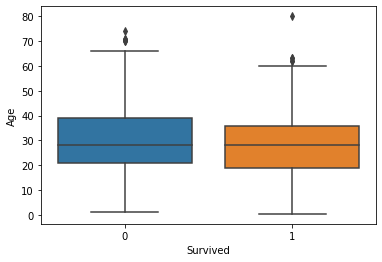

In [48]:
sns.boxplot(data=df, x="Survived", y ="Age")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

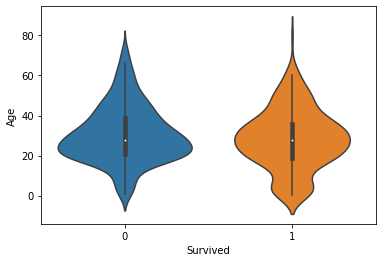

In [49]:
sns.violinplot(data=df, x="Survived", y ="Age")

## Fare vs Label

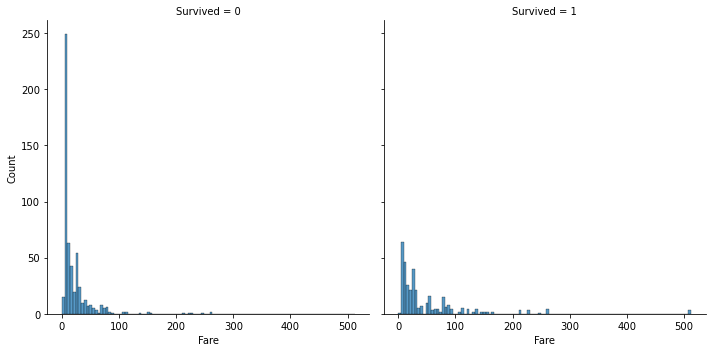

In [50]:
sns.displot(data = df, x = 'Fare', col = "Survived")

# Save the dataset for next steps (Preprocessing and Modeling)

In [51]:
df.to_csv("datasets/train_next_steps.csv")